In [39]:
#initial import of relevant packages for graphing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [40]:
#initial read and print of motifs_dataframe
motifs_df = pd.read_csv("../rosetta_motifs/motifs_rmsds.csv")
motifs_df

,system,rmsd,placement_pdb
0,aa2ar,4.147040,aa2ar_ResPos_159_ResID_PHE_Trio25_+_motif_1OU4...
1,abl1,0.124568,abl1_ResPos_83_ResID_THR_Trio42_+_motif_6DWM_H...
2,ace,0.407009,ace_ResPos_293_ResID_SER_Trio17_+_motif_7Q26_8...
3,aces,0.133846,aces_ResPos_52_ResID_TRP_Trio65_+_motif_7AIX_8...
4,ada,0.272664,ada_ResPos_151_ResID_MET_Trio38_+_motif_3UZC_T...
...,...,...,...
80,thb,0.165592,thb_ResPos_115_ResID_LEU_Trio20_+_motif_4A6E_A...
81,thrb,0.214373,thrb_ResPos_111_ResID_LEU_Trio18_+_motif_5AFJ_...
82,tryb1,0.429380,tryb1_ResPos_209_ResID_GLU_Trio49_+_motif_5F6D...
83,urok,0.160134,urok_ResPos_208_ResID_CYS_Trio60_+_motif_2A1D_...


In [41]:
#initial read and print of Schrodinger Glide dataframe
dock_df = pd.read_csv("../dock6/output_files/dock6_best_rmsds.csv")
dock_df

,def,1.0914958389592462
0,nram,5.959094
1,fa10,0.180092
2,fak1,0.278123
3,aofb,0.417968
4,reni,0.196602
...,...,...
96,aldr,0.527157
97,inha,1.124074
98,pur2,0.610745
99,pgh2,0.233567


In [33]:
#remove any nan
dock_df = dock_df[dock_df['rmsd'].isna() == False]
dock_df

KeyError: 'rmsd'

In [ ]:
#Inner join of motifs and dock dataframes for plotting purposes; followed with test print
merged_df = pd.merge(motifs_df, dock_df, on='system', how='inner')
merged_df

In [ ]:
#drop non-needed columns from merged dataframe
merged_df = merged_df.drop(columns=['placement_pdb'])
#rename columns for rmsd from motifs and autodock
merged_df.columns = ['system', 'rmsd_motifs', 'rmsd_dock']
#test_print
merged_df

In [ ]:
type(merged_df['rmsd_dock'][0])
type(merged_df['rmsd_motifs'][0])
print(merged_df['rmsd_dock'])

In [ ]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs

#copy out rmsd columns of motifs and autodock
x = merged_df['rmsd_motifs']
y = merged_df['rmsd_dock']

#create a 2d histogram of the rmsd columns with 30 bins in each dimension
heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 30))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

#set plot labels
plt.xlabel('rmsd_motifs')
plt.ylabel('rmsd_dock')

#create 2d heatmap using viridis color scale
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='viridis', aspect='auto')

#add color bar
plt.colorbar()

#add grid
plt.grid(True)

#show plot
plt.show()

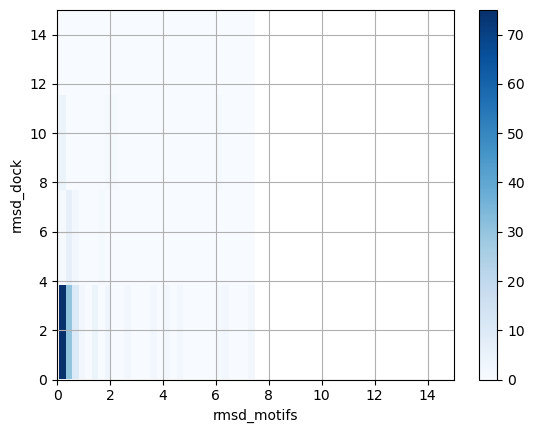

In [34]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = merged_df['rmsd_motifs']
y = merged_df['rmsd_dock']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 30))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('rmsd_motifs')
plt.ylabel('rmsd_dock')

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')

plt.colorbar()

plt.grid(True)
plt.xlim(0,15)
plt.ylim(0,15)
plt.show()

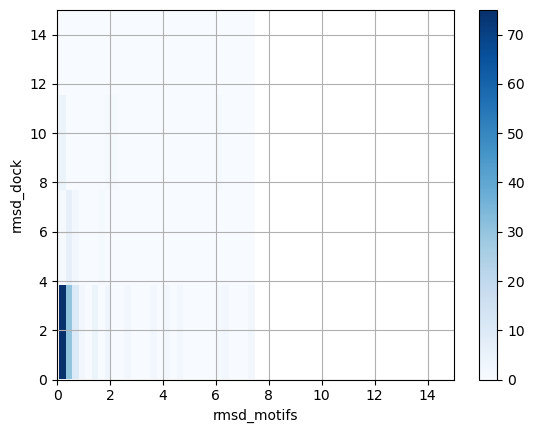

In [35]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = merged_df['rmsd_motifs']
y = merged_df['rmsd_dock']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 30))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('rmsd_motifs')
plt.ylabel('rmsd_dock')

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')

plt.colorbar()

plt.grid(True)
plt.xlim(0,15)
plt.ylim(0,15)
plt.show()

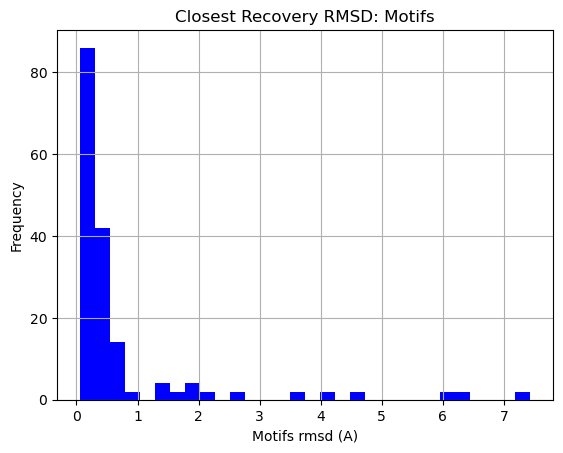

In [36]:
#create heatmap of Motifs closest recovery RMSDs

#extract motifs rmsds
x = merged_df['rmsd_motifs']
#set labels and title
plt.xlabel('Motifs rmsd (A)')
plt.ylabel('Frequency')
plt.title('Closest Recovery RMSD: Motifs')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

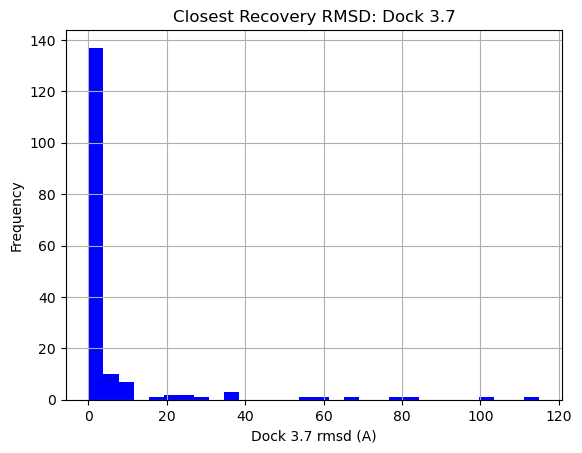

In [37]:
#create heatmap of Schrodinger closest recovery RMSDs

x = merged_df['rmsd_dock']
plt.xlabel('Dock 3.7 rmsd (A)')
plt.ylabel('Frequency')
plt.title('Closest Recovery RMSD: Dock 3.7')
plt.hist(x, bins=30, color='blue')
plt.grid(True)
plt.show()

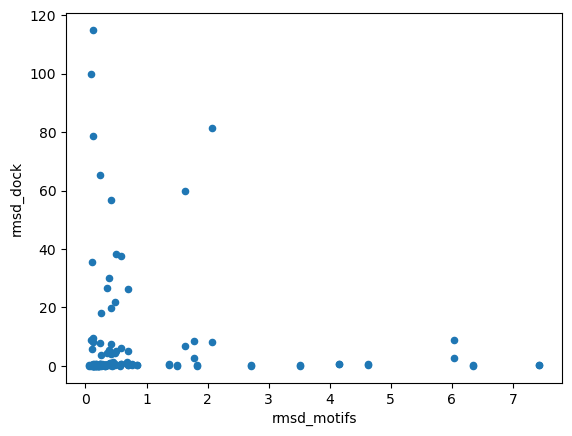

In [38]:
#make a scatterplot in the place of the heatmap
merged_df.plot(kind='scatter',x='rmsd_motifs',y='rmsd_dock')
#plt.xlim(0,15)
#plt.ylim(0,15)
plt.show()

In [29]:
#get a list of the dock placements that are really far away from native (>20 angstrom rmsd)
#remove any nan
dock_df_awful_rmsd = dock_df[dock_df['rmsd'] > 20]
dock_df_awful_rmsd

,system,rmsd
8,akt1,35.535808
11,ampc,29.898197
15,braf,59.709253
17,casp3,81.442283
18,cdk2,59.674002
19,comt,21.860533
22,csf1r,78.817143
39,fpps,26.365473
40,gcr,117.254320
42,gria2,65.421162
